In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#cd /content/drive/MyDrive/Colab\ Notebooks/house-prices-advanced-regression-techniques

# House Price Prediction

## Data Description


    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


## import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
#pd.set_option('max_columns',100)

In [5]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

## data stats

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.shape

(1460, 81)

In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

- there are total 80 feature with 1 target
- total no. of rows = 1460

In [9]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [10]:
abs(df_train.corr()['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [11]:
df_train.isna().sum()[df_train.isna().sum() !=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
df_test.isna().sum()[df_test.isna().sum() !=0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

## Missing values

### easy_to_use_functions

In [13]:
def get_feature_description(feature):
    with open("data/data_description.txt", mode='r') as des:
        i=0
        for line in des:
            if feature in line:
                print(line)
                i = 1
            elif ("\t" in line) and (i==1):
                print(line)
            elif (":" in line) & (i==1):
                break

In [14]:
get_feature_description('Street')

Street: Type of road access to property

       Grvl	Gravel	

       Pave	Paved

       	



In [15]:
def fill_na_with(feature,value):
        df_train[feature] = df_train[feature].fillna(value)
        df_test[feature] = df_test[feature].fillna(value)

In [16]:
def get_missing_deatils(feature):
    print("train missing values:",df_train[feature].isna().sum())
    print("test missing values:",df_test[feature].isna().sum())
    print("\n")
    get_feature_description(feature)

- let's try to fill the missing values one by one

### MSZoning

In [17]:
get_missing_deatils('MSZoning')

train missing values: 0
test missing values: 4


MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential Low Density Park 

       RM	Residential Medium Density

	



<AxesSubplot:xlabel='MSZoning', ylabel='count'>

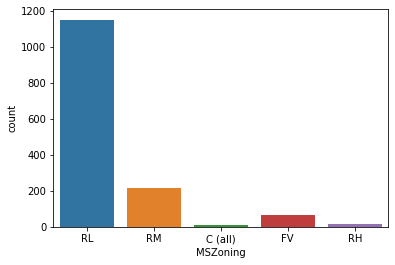

In [18]:
sns.countplot(x ='MSZoning', data=df_train)

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

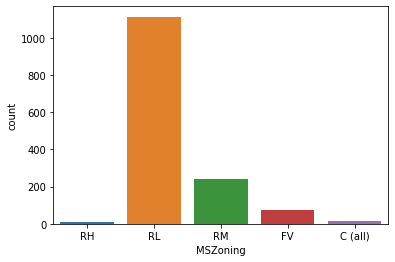

In [19]:
sns.countplot(x ='MSZoning', data=df_test)

- we noticed that we don't have all the categories of MSZoning
- only test data have the missing value of MSZoning
- most of the MSZoning is RL

In [20]:
df_test[df_test["MSZoning"].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


- these all 4 rows have BldgType as 1Fam,
hence we can fill their MSZoning as the mode of those who also have BldgType as 1Fam

In [21]:
df_test[df_test['BldgType']=='1Fam']['MSZoning'].value_counts()

RL         984
RM         162
FV          39
C (all)     13
RH           3
Name: MSZoning, dtype: int64

In [22]:
fill_na_with('MSZoning','RL')

### LotFrontage

In [23]:
get_missing_deatils('LotFrontage')

train missing values: 259
test missing values: 227


LotFrontage: Linear feet of street connected to property



In [24]:
df_train[df_train['LotFrontage'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000


<AxesSubplot:xlabel='LotArea', ylabel='LotFrontage'>

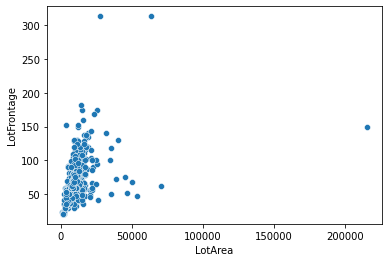

In [25]:
sns.scatterplot(x='LotArea',y='LotFrontage',data=df_train)

<AxesSubplot:xlabel='LotArea', ylabel='LotFrontage'>

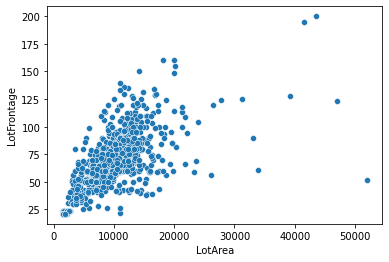

In [26]:
sns.scatterplot(x='LotArea',y='LotFrontage',data=df_test)

- first of all we have noticed that there are three outliners in the train data as there is no such house whose LotArea is greater than 60,000 or LotFrontage is greater than 200 in the test data,
 hence removing them

In [27]:
ind = df_train[ (df_train['LotArea'] >70000) | (df_train['LotFrontage']>250) ].index
df_train.loc[ind]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [28]:
df_train = df_train.drop(ind)

In [29]:
df_train['LotFrontage'].describe()

count    1197.000000
mean       69.583960
std        22.077183
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       182.000000
Name: LotFrontage, dtype: float64

- now we know that there LotArea and LotFrontage are related, let's try to find the correlation between them

In [30]:
df_train['LotFrontage'].corr(df_train['LotArea'])

0.5253213746385711

not so great correlation, hence let's find another way

- LotFrontage's value will get effected by  LotShape, LotConfig and Neighborhood
- hence let's try to fill the missing value by the mean LotFrontage after grouping by them

In [31]:
df_train['LotFrontage']  =  df_train['LotFrontage'].fillna( df_train.groupby([ 'LotShape', 'LotConfig',  'Neighborhood' ])['LotFrontage'].transform('mean') )
df_test['LotFrontage']  =  df_test['LotFrontage'].fillna( df_train.groupby([ 'LotShape', 'LotConfig',  'Neighborhood' ])['LotFrontage'].transform('mean') )

In [32]:
df_test.isna().sum()['LotFrontage']

6

In [33]:
df_train.isna().sum()['LotFrontage']

31

- we still have few values left as there can be missing values in LotShape, LotConfig or Neighborhood also

In [34]:
df_train['LotFrontage'].describe()

count    1422.000000
mean       70.055144
std        21.619643
min        21.000000
25%        60.000000
50%        70.000000
75%        81.000000
max       182.000000
Name: LotFrontage, dtype: float64

- As our mean and std remains almost same, this means that out distribution of data haven't changed

- let's fill the remaining values by the mean after grouping by Neighborhood

In [35]:
df_train['LotFrontage']  =  df_train['LotFrontage'].fillna( df_train.groupby([ 'Neighborhood'])['LotFrontage'].transform('mean') )
df_test['LotFrontage']  =  df_test['LotFrontage'].fillna( df_train.groupby([ 'Neighborhood'])['LotFrontage'].transform('mean') )

In [36]:
df_train.isna().sum()['LotFrontage']

0

In [37]:
df_test.isna().sum()['LotFrontage']

2

- filling the remaining value simply with the mean of LotFrontage

In [38]:
mean = df_test['LotFrontage'].mean()
fill_na_with('LotFrontage',mean)

### Alley

In [39]:
get_missing_deatils('Alley')

train missing values: 1362
test missing values: 1352


Alley: Type of alley access to property

       Grvl	Gravel

       Pave	Paved

       NA 	No alley access

		



In [40]:
df_train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

- we have one option as None means no alley access, but in data set these are filled with nan 
- Hence replacing them with "None"

In [41]:
fill_na_with('Alley','None')

### Utilities

In [42]:
get_missing_deatils('Utilities')

train missing values: 0
test missing values: 2


Utilities: Type of utilities available

		

       AllPub	All public Utilities (E,G,W,& S)	

       NoSewr	Electricity, Gas, and Water (Septic Tank)

       NoSeWa	Electricity and Gas Only

       ELO	Electricity only	

	



In [43]:
df_test[df_test['Utilities'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,RL,109.000000,21780,Grvl,None,Reg,Lvl,NaN,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
485,1946,20,RL,72.316239,31220,Pave,None,IR1,Bnk,NaN,...,0,0,NaN,NaN,Shed,750,5,2008,WD,Normal


- let's fill these values with the mode

In [44]:
mode = df_test['Utilities'].mode()[0]
fill_na_with('Utilities',mode)

### Exterior1st

In [45]:
get_missing_deatils('Exterior1st')

train missing values: 0
test missing values: 1


Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles

       AsphShn	Asphalt Shingles

       BrkComm	Brick Common

       BrkFace	Brick Face

       CBlock	Cinder Block

       CemntBd	Cement Board

       HdBoard	Hard Board

       ImStucc	Imitation Stucco

       MetalSd	Metal Siding

       Other	Other

       Plywood	Plywood

       PreCast	PreCast	

       Stone	Stone

       Stucco	Stucco

       VinylSd	Vinyl Siding

       Wd Sdng	Wood Siding

       WdShing	Wood Shingles

	



- let's fill this also with the mode

In [46]:
mode = df_test['Exterior1st'].mode()[0]
fill_na_with('Exterior1st',mode)

### Exterior2nd

In [47]:
get_missing_deatils('Exterior2nd')

train missing values: 0
test missing values: 1


Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles

       AsphShn	Asphalt Shingles

       BrkComm	Brick Common

       BrkFace	Brick Face

       CBlock	Cinder Block

       CemntBd	Cement Board

       HdBoard	Hard Board

       ImStucc	Imitation Stucco

       MetalSd	Metal Siding

       Other	Other

       Plywood	Plywood

       PreCast	PreCast

       Stone	Stone

       Stucco	Stucco

       VinylSd	Vinyl Siding

       Wd Sdng	Wood Siding

       WdShing	Wood Shingles

	



- we can fill this too with the mode as very few rows have the missing values

In [48]:
mode = df_test['Exterior2nd'].mode()[0]
fill_na_with('Exterior2nd',mode)

### MasVnrType

In [49]:
get_missing_deatils('MasVnrType')

train missing values: 8
test missing values: 16


MasVnrType: Masonry veneer type

       BrkCmn	Brick Common

       BrkFace	Brick Face

       CBlock	Cinder Block

       None	None

       Stone	Stone

	



- we can fill these values with the None

In [50]:
fill_na_with('MasVnrType','None')

### MasVnrArea

In [51]:
get_missing_deatils('MasVnrArea')

train missing values: 8
test missing values: 15


MasVnrArea: Masonry veneer area in square feet



In [52]:
df_train[df_train['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,67.875000,7851,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,71.137026,32668,Pave,None,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.000000,8125,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.000000,10083,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.000000,11639,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.000000,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.000000,13891,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.000000,9473,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


- we noticed here that all the missing values have MasVnrType as None,
let's see what's their MasVnrArea

In [53]:
df_train[df_train['MasVnrType'] == "None"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


- hence filling the Nan values with 0.0 where MasVnrType is None

In [54]:
fill_na_with('MasVnrArea',0.0)

### BsmtQual

In [55]:
get_missing_deatils('BsmtQual')

train missing values: 37
test missing values: 44


BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	

       Gd	Good (90-99 inches)

       TA	Typical (80-89 inches)

       Fa	Fair (70-79 inches)

       Po	Poor (<70 inches

       NA	No Basement

		



- here we can fill the missing values with None, which means No Basement

In [56]:
fill_na_with('BsmtQual','None')

### BsmtCond

In [57]:
get_missing_deatils('BsmtCond')

train missing values: 37
test missing values: 45


BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent

       Gd	Good

       TA	Typical - slight dampness allowed

       Fa	Fair - dampness or some cracking or settling

       Po	Poor - Severe cracking, settling, or wetness

       NA	No Basement

	



In [58]:
fill_na_with('BsmtCond','None')

### BsmtExposure

In [59]:
get_missing_deatils('BsmtExposure')

train missing values: 38
test missing values: 44


BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure

       Av	Average Exposure (split levels or foyers typically score average or above)	

       Mn	Mimimum Exposure

       No	No Exposure

       NA	No Basement

	



- we can fill this with None

In [60]:
fill_na_with('BsmtExposure','None')

### BsmtFinType1

In [61]:
get_missing_deatils('BsmtFinType1')

train missing values: 37
test missing values: 42


BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters

       ALQ	Average Living Quarters

       BLQ	Below Average Living Quarters	

       Rec	Average Rec Room

       LwQ	Low Quality

       Unf	Unfinshed

       NA	No Basement

		



- this also can be filled with None

In [62]:
fill_na_with('BsmtFinType1','None')

### BsmtFinSF1

In [63]:
get_missing_deatils('BsmtFinSF1')

train missing values: 0
test missing values: 1


BsmtFinSF1: Type 1 finished square feet



In [64]:
df_test[df_test['BsmtFinSF1'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


- we can fill this value with 0 as there is no basement at all

In [65]:
fill_na_with('BsmtFinSF1',0.0)

### BsmtFinType2

In [66]:
get_missing_deatils('BsmtFinType2')

train missing values: 38
test missing values: 42


BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters

       ALQ	Average Living Quarters

       BLQ	Below Average Living Quarters	

       Rec	Average Rec Room

       LwQ	Low Quality

       Unf	Unfinshed

       NA	No Basement



- let's fill these values too with None

In [67]:
fill_na_with('BsmtFinType2','None')

### BsmtFinSF2

In [68]:
get_missing_deatils('BsmtFinSF2')

train missing values: 0
test missing values: 1


BsmtFinSF2: Type 2 finished square feet



In [69]:
df_test[df_test['BsmtFinSF2'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


- we can fill this with 0 as BsmtFinType2 is None

In [70]:
fill_na_with('BsmtFinSF2',0.0)

### BsmtUnfSF

In [71]:
get_missing_deatils('BsmtUnfSF')

train missing values: 0
test missing values: 1


BsmtUnfSF: Unfinished square feet of basement area



In [72]:
df_test[df_test['BsmtUnfSF'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


- as both type1 and type2 of Bsmt is None,
hence there is high chance that the value of Unfinished bsmt are is also 0
- hence filling it with 0

In [73]:
fill_na_with('BsmtUnfSF',0.0)

### TotalBsmtSF

In [74]:
get_missing_deatils('TotalBsmtSF')

train missing values: 0
test missing values: 1


TotalBsmtSF: Total square feet of basement area



In [75]:
df_test[df_test['TotalBsmtSF'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


- As all the bsmt value is zero, hence total bsmt area will also be zero
hence filling it with 0

In [76]:
fill_na_with('TotalBsmtSF',0)

### BsmtFullBath

In [77]:
get_missing_deatils('BsmtFullBath')

train missing values: 0
test missing values: 2


BsmtFullBath: Basement full bathrooms



In [78]:
df_test[df_test['BsmtFullBath'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
728,2189,20,RL,123.0,47007,Pave,None,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


- it look like that there is no bsmt at all
hence filling these values with 0

In [79]:
fill_na_with('BsmtFullBath',0.0)

### BsmtHalfBath

In [80]:
get_missing_deatils('BsmtHalfBath')

train missing values: 0
test missing values: 2


BsmtHalfBath: Basement half bathrooms



In [81]:
df_test[df_test['BsmtHalfBath'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
728,2189,20,RL,123.0,47007,Pave,None,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


- here is also no bsmt, hence filling these values with 0

In [82]:
fill_na_with('BsmtHalfBath',0.0)

### KitchenQual

In [83]:
get_missing_deatils('KitchenQual')

train missing values: 0
test missing values: 1


KitchenQual: Kitchen quality

       Ex	Excellent

       Gd	Good

       TA	Typical/Average

       Fa	Fair

       Po	Poor

       	



In [84]:
df_test[df_test['KitchenQual'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,None,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal


- we can fill this value with the mode of those who have 1 KitchenAbvGr

In [85]:
mode = df_test[df_test['KitchenAbvGr']==1]['KitchenQual'].mode()[0]
fill_na_with('KitchenQual',mode)

### Functional

In [86]:
get_missing_deatils('Functional')

train missing values: 0
test missing values: 2


Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality

       Min1	Minor Deductions 1

       Min2	Minor Deductions 2

       Mod	Moderate Deductions

       Maj1	Major Deductions 1

       Maj2	Major Deductions 2

       Sev	Severely Damaged

       Sal	Salvage only

		



In [87]:
df_test[df_test['Functional'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
756,2217,20,RL,80.0,14584,Pave,None,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,...,84,0,NaN,NaN,NaN,0,9,2007,COD,Abnorml


- As only two rows have missing values of Functional, we can fill that with the mode

In [88]:
mode = df_test['Functional'].mode()[0]
fill_na_with('Functional',mode)

### FireplaceQu

In [89]:
get_missing_deatils('FireplaceQu')

train missing values: 690
test missing values: 730


FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace

       Gd	Good - Masonry Fireplace in main level

       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement

       Fa	Fair - Prefabricated Fireplace in basement

       Po	Poor - Ben Franklin Stove

       NA	No Fireplace

		



- here we can fill the missing values with None, as here missing values means there is no Fireplace

In [90]:
fill_na_with('FireplaceQu','None')

### GarageType

In [91]:
get_missing_deatils('GarageType')

train missing values: 81
test missing values: 76


GarageType: Garage location

		

       2Types	More than one type of garage

       Attchd	Attached to home

       Basment	Basement Garage

       BuiltIn	Built-In (Garage part of house - typically has room above garage)

       CarPort	Car Port

       Detchd	Detached from home

       NA	No Garage

		



- here also we can fill it with None, as there is No Garage

In [92]:
fill_na_with('GarageType','None')

### GarageYrBlt

In [93]:
get_missing_deatils('GarageYrBlt')

train missing values: 81
test missing values: 78


GarageYrBlt: Year garage was built

		



In [94]:
df_train[df_train['GarageType']=="None"]['GarageYrBlt'].isna().sum()

81

In [95]:
df_test[df_test['GarageType']=="None"]['GarageYrBlt'].isna().sum()

76

- most of the missing rows don't have the garage,
- while two test data seems to have the value of GarageType but not the value of GarageBlt, let's see them

In [96]:
df_test[df_test['GarageType']!="None"] [df_test[df_test['GarageType']!="None"]['GarageYrBlt'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
666,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal
1116,2577,70,RM,50.0,9060,Pave,None,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


- so those two now don't have Garage currently they are detached from home,
therefore we can assign them a separate value from rest

In [97]:
df_train['GarageYrBlt'].describe()

count    1372.000000
mean     1978.540816
std        24.722187
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

- let's assign them -1

In [98]:
fill_na_with('GarageYrBlt',-1)

### GarageFinish

In [99]:
get_missing_deatils('GarageFinish')

train missing values: 81
test missing values: 78


GarageFinish: Interior finish of the garage

       Fin	Finished

       RFn	Rough Finished	

       Unf	Unfinished

       NA	No Garage

		



- here we can fill these values with None, as there is No Garage

In [100]:
fill_na_with('GarageFinish','None')

### GarageCars

In [101]:
get_missing_deatils('GarageCars')

train missing values: 0
test missing values: 1


GarageCars: Size of garage in car capacity



In [102]:
df_test[df_test['GarageCars'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1116,2577,70,RM,50.0,9060,Pave,None,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


- there is no garage at all, hence fillng this with 0

In [103]:
fill_na_with('GarageCars',0.0)

### GarageArea

In [104]:
get_missing_deatils('GarageArea')

train missing values: 0
test missing values: 1


GarageArea: Size of garage in square feet



In [105]:
df_test[df_test['GarageArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1116,2577,70,RM,50.0,9060,Pave,None,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


- there is no garage, hence we can fill it with 0

In [106]:
fill_na_with('GarageArea',0.0)

### GarageQual

In [107]:
get_missing_deatils('GarageQual')

train missing values: 81
test missing values: 78


GarageQual: Garage quality

       Ex	Excellent

       Gd	Good

       TA	Typical/Average

       Fa	Fair

       Po	Poor

       NA	No Garage

		



- we can fill the missing values with None

In [108]:
fill_na_with('GarageQual','None')

### GarageCond

In [109]:
get_missing_deatils('GarageCond')

train missing values: 81
test missing values: 78


GarageCond: Garage condition

       Ex	Excellent

       Gd	Good

       TA	Typical/Average

       Fa	Fair

       Po	Poor

       NA	No Garage

		



- we can fill the missing values with None, as there is No Garage at all

In [110]:
fill_na_with('GarageCond','None')

### PoolQC

In [111]:
get_missing_deatils('PoolQC')

train missing values: 1447
test missing values: 1456


PoolQC: Pool quality

		

       Ex	Excellent

       Gd	Good

       TA	Average/Typical

       Fa	Fair

       NA	No Pool

		



- Again here missing values means there is no pool at all, hence filling them with None

In [112]:
fill_na_with('PoolQC','None')

### Fence

In [113]:
get_missing_deatils('Fence')

train missing values: 1172
test missing values: 1169


Fence: Fence quality

		

       GdPrv	Good Privacy

       MnPrv	Minimum Privacy

       GdWo	Good Wood

       MnWw	Minimum Wood/Wire

       NA	No Fence

	



- here also missing values means No Fence, we can fill that with None

In [114]:
fill_na_with('Fence','None')

### MiscFeature

In [115]:
get_missing_deatils('MiscFeature')

train missing values: 1401
test missing values: 1408


MiscFeature: Miscellaneous feature not covered in other categories

		

       Elev	Elevator

       Gar2	2nd Garage (if not described in garage section)

       Othr	Other

       Shed	Shed (over 100 SF)

       TenC	Tennis Court

       NA	None

		



- here also filling the missing values with None

In [116]:
fill_na_with('MiscFeature','None')

### SaleType

In [117]:
get_missing_deatils('SaleType')

train missing values: 0
test missing values: 1


SaleType: Type of sale

		

       WD 	Warranty Deed - Conventional

       CWD	Warranty Deed - Cash

       VWD	Warranty Deed - VA Loan

       New	Home just constructed and sold

       COD	Court Officer Deed/Estate

       Con	Contract 15% Down payment regular terms

       ConLw	Contract Low Down payment and low interest

       ConLI	Contract Low Interest

       ConLD	Contract Low Down

       Oth	Other

		



In [118]:
df_test[df_test['SaleType'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1029,2490,20,RL,85.0,13770,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,10,2007,NaN,Normal


- As there is only one missing value we can easily fill it with the mode

In [119]:
mode = df_test['SaleType'].mode()[0]
fill_na_with('SaleType',mode)

### Electrical

In [120]:
get_missing_deatils('Electrical')

train missing values: 1
test missing values: 0


Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex

       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	

       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)

       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)

       Mix	Mixed

		



In [121]:
df_train[ df_train['Electrical'].isna() ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2008,WD,Normal,167500


- Again we can fill this with the mode value

In [122]:
mode = df_test['Electrical'].mode()[0]
fill_na_with('Electrical',mode)

In [123]:
get_missing_deatils('BsmtQual')

train missing values: 0
test missing values: 0


BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	

       Gd	Good (90-99 inches)

       TA	Typical (80-89 inches)

       Fa	Fair (70-79 inches)

       Po	Poor (<70 inches

       NA	No Basement

		



## Final Saving

- Here in this data set most of the missing values meant that particular feature is not present at all, we have filled those with the Keyword 'None'

In [124]:
df_train.to_csv("data/filled_missing_train.csv",index=False)
df_test.to_csv("data/filled_missing_test.csv",index=False)

In [127]:
df_train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)